In [1]:
import pandas as pd
import numpy as np

In [13]:
data = pd.read_csv("/content/sample_data/online payment fraud detection.csv")
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 11 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   step            1048575 non-null  int64  
 1   type            1048575 non-null  object 
 2   amount          1048575 non-null  float64
 3   nameOrig        1048575 non-null  object 
 4   oldbalanceOrg   1048575 non-null  float64
 5   newbalanceOrig  1048575 non-null  float64
 6   nameDest        1048575 non-null  object 
 7   oldbalanceDest  1048575 non-null  float64
 8   newbalanceDest  1048575 non-null  float64
 9   isFraud         1048575 non-null  int64  
 10  isFlaggedFraud  1048575 non-null  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 88.0+ MB
None


In [14]:
print(data.describe())

               step        amount  oldbalanceOrg  newbalanceOrig  \
count  1.048575e+06  1.048575e+06   1.048575e+06    1.048575e+06   
mean   2.696617e+01  1.586670e+05   8.740095e+05    8.938089e+05   
std    1.562325e+01  2.649409e+05   2.971751e+06    3.008271e+06   
min    1.000000e+00  1.000000e-01   0.000000e+00    0.000000e+00   
25%    1.500000e+01  1.214907e+04   0.000000e+00    0.000000e+00   
50%    2.000000e+01  7.634333e+04   1.600200e+04    0.000000e+00   
75%    3.900000e+01  2.137619e+05   1.366420e+05    1.746000e+05   
max    9.500000e+01  1.000000e+07   3.890000e+07    3.890000e+07   

       oldbalanceDest  newbalanceDest       isFraud  isFlaggedFraud  
count    1.048575e+06    1.048575e+06  1.048575e+06       1048575.0  
mean     9.781600e+05    1.114198e+06  1.089097e-03             0.0  
std      2.296780e+06    2.416593e+06  3.298351e-02             0.0  
min      0.000000e+00    0.000000e+00  0.000000e+00             0.0  
25%      0.000000e+00    0.000000e+00

In [15]:
print(data["isFraud"].value_counts(normalize=True))

isFraud
0    0.998911
1    0.001089
Name: proportion, dtype: float64


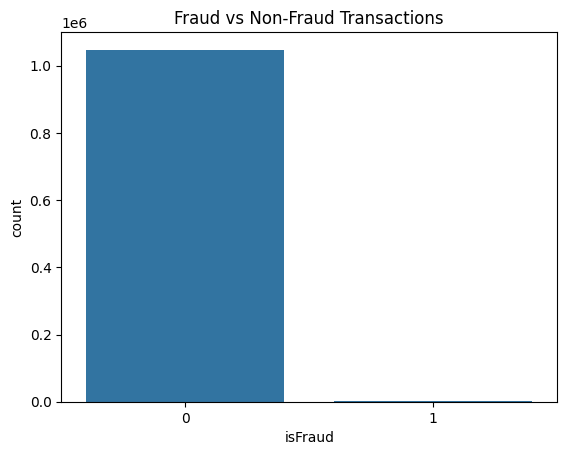

In [18]:
#Target Class Distribution
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(x="isFraud", data=data)
plt.title("Fraud vs Non‑Fraud Transactions")
plt.show()

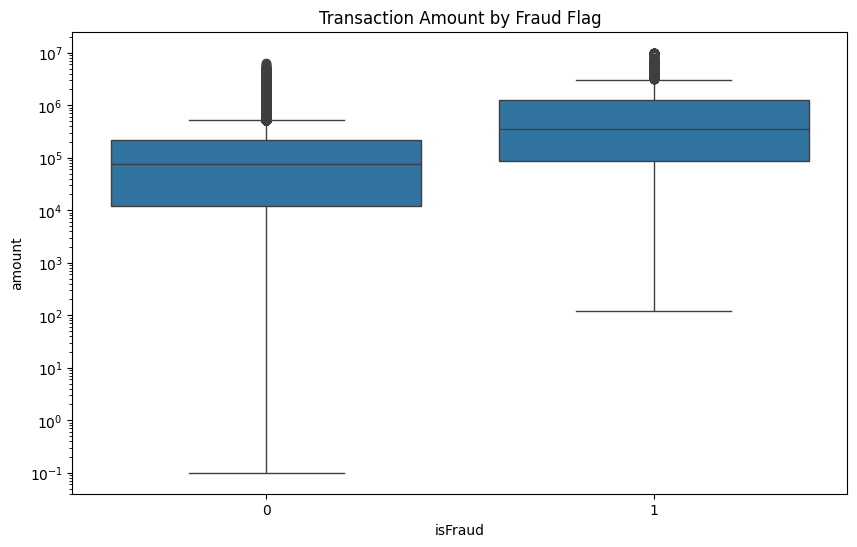

In [19]:
#Transaction Amount vs Class
plt.figure(figsize=(10,6))
sns.boxplot(x="isFraud", y="amount", data=data)
plt.title("Transaction Amount by Fraud Flag")
plt.yscale('log')  # If needed to reduce skew
plt.show()


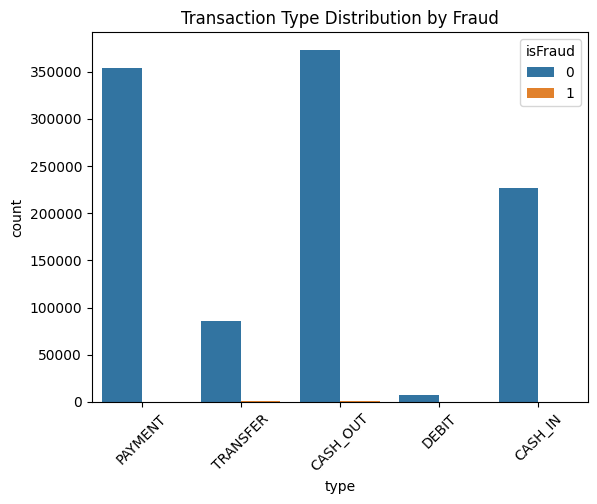

In [20]:
#Transaction Type & Fraud
sns.countplot(x="type", hue="isFraud", data=data)
plt.title("Transaction Type Distribution by Fraud")
plt.xticks(rotation=45)
plt.show()


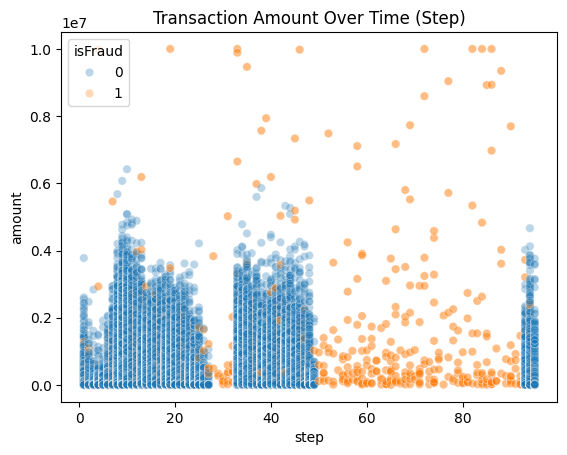

In [21]:
#Time vs Amount Patterns
sns.scatterplot(x="step", y="amount", hue="isFraud", data=data, alpha=0.3)
plt.title("Transaction Amount Over Time (Step)")
plt.show()

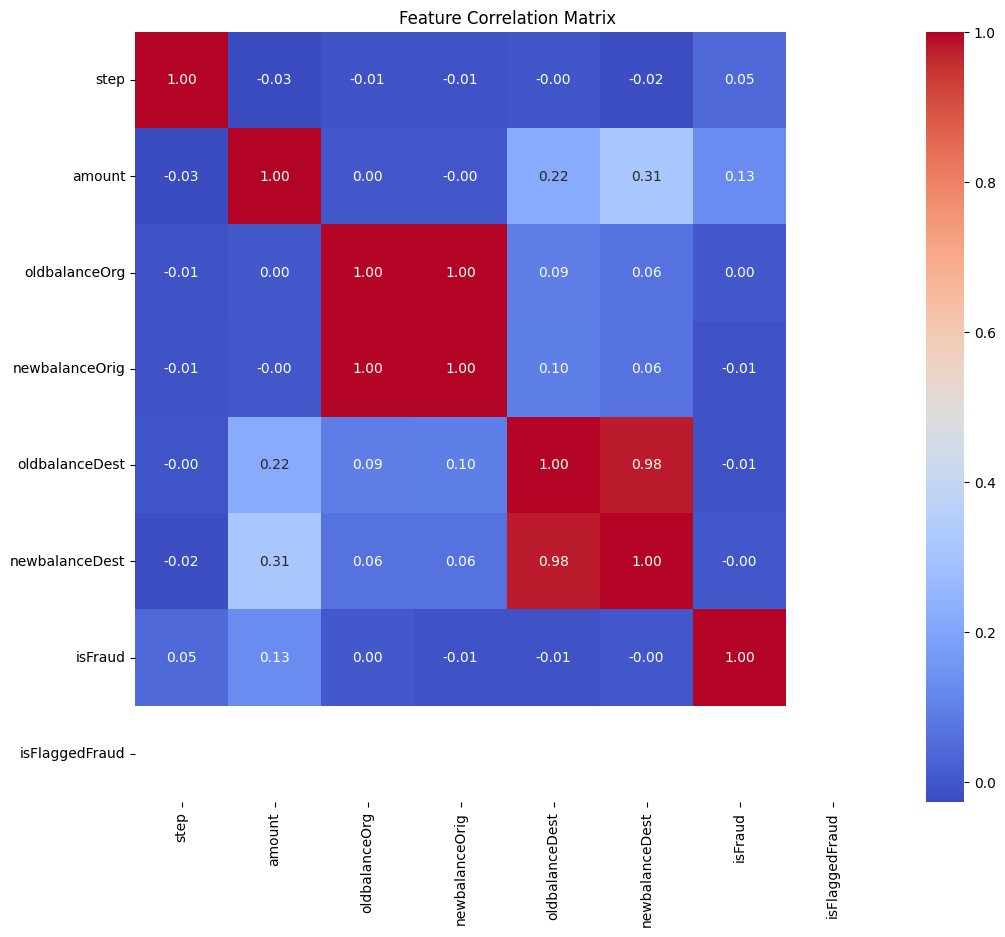

In [22]:
#Correlation Matrix + Heatmap
numeric = data.select_dtypes(include=["number"])
corr = numeric.corr()

plt.figure(figsize=(12,10))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Matrix")
plt.show()


In [23]:
#Highlighting Top Correlated Features
target_corr = corr["isFraud"].sort_values(ascending=False)
print(target_corr.head(10))

isFraud           1.000000
amount            0.128862
step              0.045030
oldbalanceOrg     0.003829
newbalanceDest   -0.000495
oldbalanceDest   -0.007552
newbalanceOrig   -0.009438
isFlaggedFraud         NaN
Name: isFraud, dtype: float64
